In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
df = pd.read_csv('Salary_Data.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [ ]:
scaler = MinMaxScaler()
df[['YearsExperience','Salary']] = scaler.fit_transform(df[['YearsExperience','Salary']])
df.head()

,YearsExperience,Salary
0,0.000000,0.019041
1,0.021277,0.100094
2,0.042553,0.000000
3,0.095745,0.068438
4,0.117021,0.025514


In [ ]:
X = df[['YearsExperience']]
y = df['Salary']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)


In [ ]:
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)

Mean Squared Error: 0.006952407238200638
Mean Absolute Error: 0.07425530156812835
Root Mean Squared Error: 0.08338109640800269


In [ ]:
print("coefficients", model.coef_)
print("intercept", model.intercept_)

coefficients [1.0463485]
intercept -0.024134421602753642


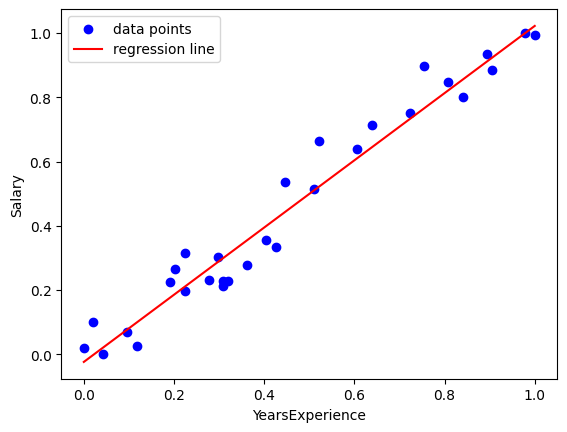

In [ ]:
plt.scatter(X,y,color='blue',label='data points')
plt.plot(X,model.predict(X),color='red',label='regression line')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.legend()
plt.show()

In [ ]:
threshold = df['Salary'].median()
df['SalaryClass'] = (df['Salary'] > threshold).astype(int)

In [ ]:
df.tail()

,YearsExperience,Salary,SalaryClass
25,0.840426,0.801453,1
26,0.893617,0.935956,1
27,0.904255,0.884763,1
28,0.978723,1.000000,1
29,1.000000,0.993870,1


In [ ]:
X = df[['YearsExperience']]
y = df['SalaryClass']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Step 7: Evaluate the model
y_pred = model.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)


print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)


Accuracy: 0.6666666666666666
Confusion Matrix:
[[2 0]
 [2 2]]
Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       1.00      0.50      0.67         4

    accuracy                           0.67         6
   macro avg       0.75      0.75      0.67         6
weighted avg       0.83      0.67      0.67         6



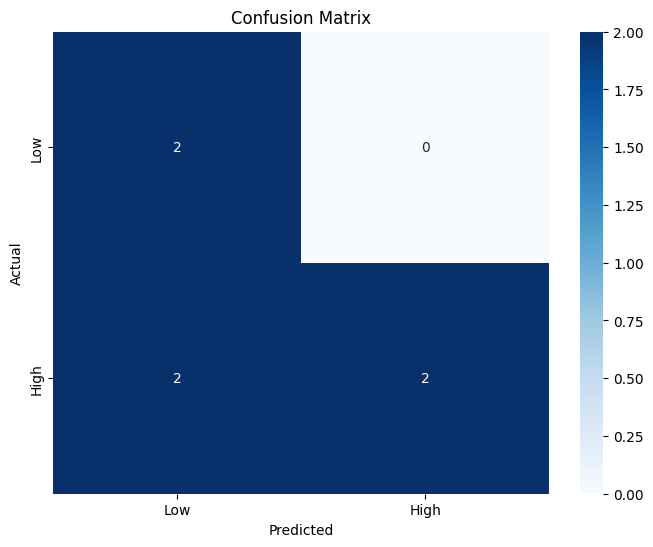

In [ ]:
#Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

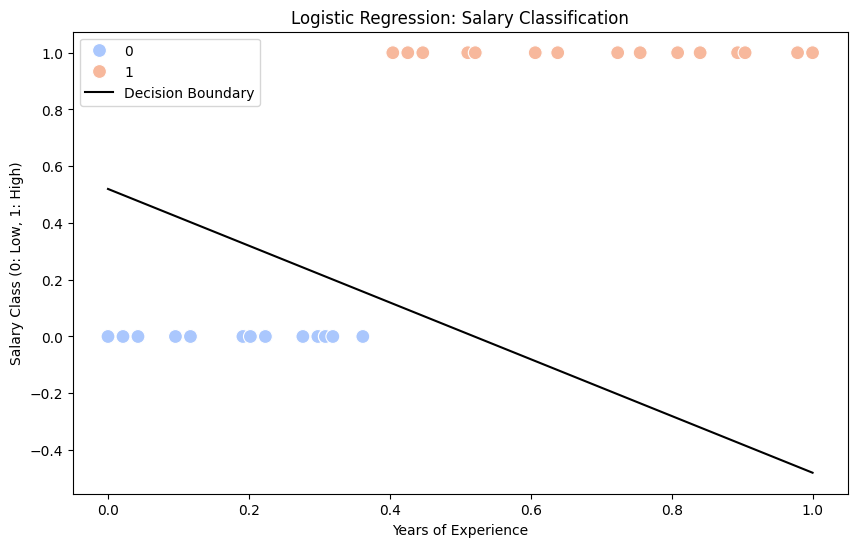

In [ ]:
# Visualize the decision boundary

plt.figure(figsize=(10, 6))

# Plotting the data points
sns.scatterplot(x='YearsExperience', y='SalaryClass', data=df, hue='SalaryClass', palette='coolwarm', s=100)

# Plotting the decision boundary
x_values = np.linspace(X['YearsExperience'].min(), X['YearsExperience'].max(), 200)
y_values = -(model.intercept_ + model.coef_[0] * x_values) / model.coef_[0][0]
plt.plot(x_values, y_values, label='Decision Boundary', color='black')

# Adding labels and title
plt.xlabel('Years of Experience')
plt.ylabel('Salary Class (0: Low, 1: High)')
plt.title('Logistic Regression: Salary Classification')

# Adding legend
plt.legend()

# Displaying the plot
plt.show()